In [1]:
import scipy.stats as stats
import numpy as np

In [2]:
x1 = [1, 2, 2, 3, 4, 5, 5, 7]
x2 = x1 + [100]

print(np.mean(x1))
print(np.mean(x2))

3.625
14.3333333333


In [3]:
print(np.median(x1))
print(np.median(x2))

3.5
4.0


In [4]:
print(stats.mode(x1)[0][0])

2


In [5]:
stats.mode(x1)

ModeResult(mode=array([2]), count=array([2]))

In [6]:
# 因此我们自定义一个求众数的函数
def mode(l):
    # 统计列表中每个元素出现的次数
    counts = {}
    for e in l:
        if e in counts:
            counts[e] += 1
        else:
            counts[e] = 1
            
    # 返回出现次数最多的元素
    maxcount = 0
    modes = {}
    for (key, value) in counts.items():
        if value > maxcount:
            maxcount = value
            modes = {key}
        elif value == maxcount:
            modes.add(key)
            
    if maxcount > 1 or len(l) == 1:
        return list(modes)
    return 'No mode'

mode(x1)

[2, 5]

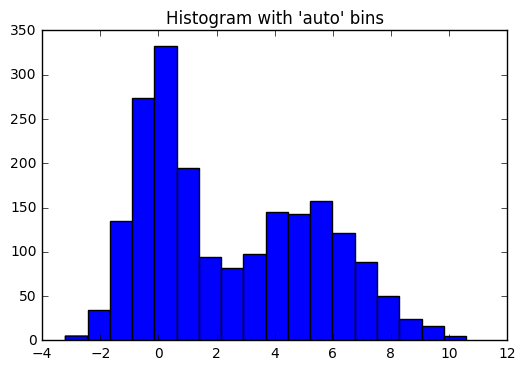

array([ 1.3315865 ,  0.71527897, -1.54540029, ...,  5.74446677,
        6.22449239,  8.42055014])

In [7]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((rng.normal(size=1000), rng.normal(loc=5, scale=2, size=1000)))
plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()
a

('Mode of bins:', [(1.0, 2.5), (4.0, 5.5)])


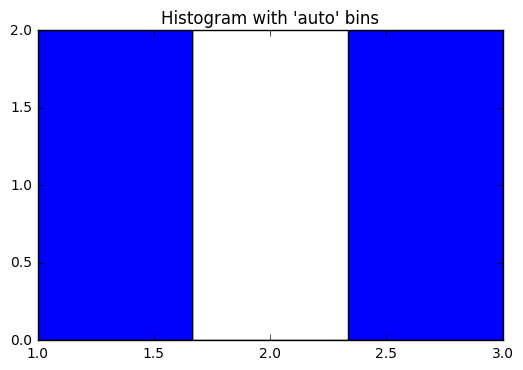

In [8]:
hist, bins = np.histogram(x1, 4) # 将数据分成2个bin
maxfreq = max(hist)
# 找出哪个bin里面出现的数据点次数最大，这个bin就当做计算出来的mode
print('Mode of bins:', [(bins[i], bins[i+1]) for i, j in enumerate(hist) if j == maxfreq])

plt.hist(hist, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [9]:
# 使用Scipy包中的gmean函数来计算几何平均值
print(stats.gmean(x1))
print(stats.gmean(x2))

3.09410402498
4.55253458762


In [11]:
#设置随机数种子
np.random.seed(121)

In [12]:
#生成20个小于100的随机整数
X = np.random.randint(100, size=20)

X = np.sort(X)

print (X)

mu = np.mean(X)

print(mu)

[ 3  8 34 39 46 52 52 52 54 57 60 65 66 75 83 85 88 94 95 96]
60.2


In [14]:
#最大值减去最小值
print(np.ptp(X))

93


In [19]:
abs_dispersion = [np.abs(mu - x) for x in X]
MAD = np.sum(abs_dispersion) / len(abs_dispersion)
MAD

20.520000000000003

In [22]:
print(np.var(X)) # 方差
print(np.std(X)) # 标准差

670.16
25.8874486962


In [34]:
k = 1.25
dist = k * np.std(X)

l = [x for x in X if abs(x - mu) <= dist]

print(float(len(l)) / len(X))
temp = 1- 1 / k ** 2

print (temp)

0.75
0.36


In [33]:
# 半方差与半标准差都需要手动计算

lows = [ e for e in X if e <= mu]

semivar = np.sum( (lows - mu) ** 2) / len(lows)

print(semivar)
print (np.sqrt(semivar))

689.512727273
26.2585743572


In [38]:
# **2为平方
a = 3 ** 2
print(a)
b = 3 ** 3
print(b)

9
27


In [41]:
# 另外一个相关的是目标半方差，是仅关注低于某一目标的样本

B = 19

lows_B = [e for e in X if e <= B]
semivar_B = sum(map(lambda x : ( x - B) ** 2, lows_B)) / len(lows_B)

print (semivar_B)
print (np.sqrt(semivar_B))

188
13.7113092008
